99 2291.160929083714
199 1587.7727084099108
299 1102.2652854170628
399 766.792227361894
499 534.7483117531626
599 374.0824530028955
699 262.7280624609591
799 185.47596175402185
899 131.83200131894992
999 94.54762289729769
1099 68.61083849947705
1199 50.552580474183216
1299 37.96931881131348
1399 29.19415396913437
1499 23.06995917317423
1599 18.792741572781985
1699 15.803373631070489
1799 13.712680775649952
1899 12.249556385203139
1999 11.224990386468775
Result : y = 0.04858487551474523 + 0.8398758627432094 x + -0.008381699482111758 x^2 + -0.09093149245011536 x^3


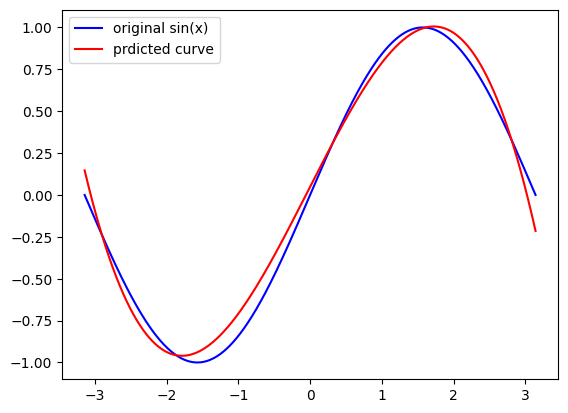

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt


x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)
        
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred    .sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a-= learning_rate * grad_a
    b-= learning_rate * grad_b
    c-= learning_rate * grad_c
    d-= learning_rate * grad_d
    
print(f"Result : y = {a} + {b} x + {c} x^2 + {d} x^3")\

plt.plot(x,y,'b', label = 'original sin(x)')
plt.plot(x,y_pred,'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

    

Result : y = -0.017167022451758385 + 0.8459848761558533 x + 0.0029615946114063263 x^2 + -0.09180044382810593 x^3


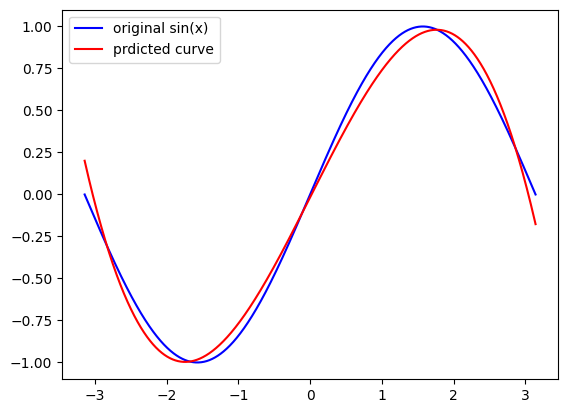

In [4]:
import torch
import math

dtype = torch.float
device = torch.device("cuda:0")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a= torch.randn((), device=device, dtype=dtype)
b= torch.randn((), device=device, dtype=dtype)
c= torch.randn((), device=device, dtype=dtype)
d= torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = (y_pred - y).pow(2).sum().item()
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a-= learning_rate * grad_a
    b-= learning_rate * grad_b
    c-= learning_rate * grad_c
    d-= learning_rate * grad_d
    
print(f"Result : y = {a} + {b} x + {c} x^2 + {d} x^3")

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

99 2870.5859375
199 2012.643310546875
299 1412.7393798828125
399 992.9896240234375
499 699.1082763671875
599 493.2297058105469
699 348.9189453125
799 247.71006774902344
899 176.69256591796875
999 126.83587646484375
1099 91.81852722167969
1199 67.21275329589844
1299 49.91578674316406
1399 37.75182342529297
1499 29.194414138793945
1599 23.172094345092773
1699 18.932422637939453
1799 15.946794509887695
1899 13.843645095825195
1999 12.361703872680664
Result : y = 0.061420660465955734 + 0.8437919616699219 x + -0.010596088133752346 x^2 + -0.09148851782083511 x^3


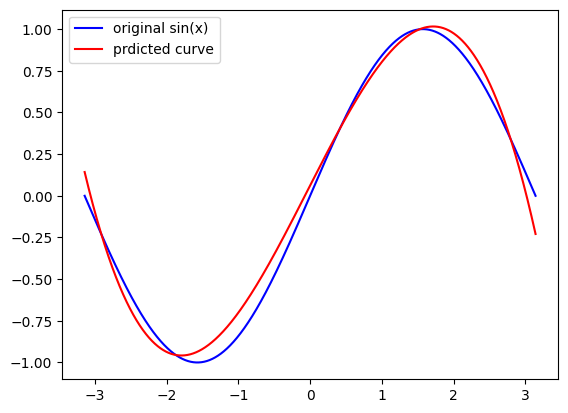

In [5]:
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype = dtype, requires_grad=True)
c = torch.randn((), dtype = dtype, requires_grad=True)
d = torch.randn((), dtype = dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
print(f"Result : y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3")

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

99 209.95834350585938
199 144.66018676757812
299 100.70250701904297
399 71.03520202636719
499 50.978511810302734
599 37.40313720703125
699 28.20686912536621
799 21.973186492919922
899 17.745729446411133
999 14.877889633178711
1099 12.931766510009766
1199 11.610918998718262
1299 10.714249610900879
1399 10.105475425720215
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943641662597656
Result : y = -3.938562670446899e-11 + -2.208526849746704 P3(1.9930161687664594e-11 + 0.2554861009120941 x)


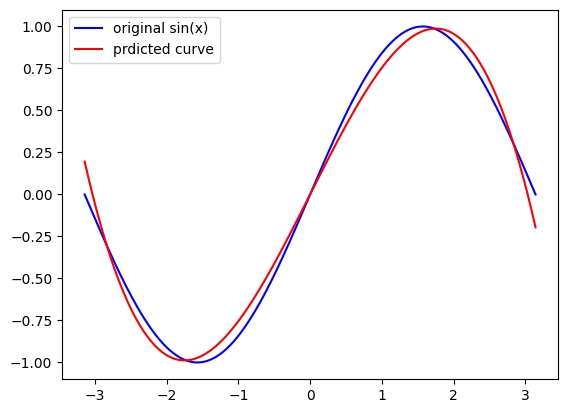

In [6]:
import torch
import math

class LegendrePolynomial3(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)
    
dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype, device=device)
y = torch.sin(x)

a = torch.full((), 0.0, dtype=dtype, device=device, requires_grad=True)
b = torch.full((), -1.0, dtype=dtype, device=device, requires_grad=True)
c = torch.full((), 0.0, dtype=dtype, device=device, requires_grad=True)
d = torch.full((), 0.3, dtype=dtype, device=device, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    P3 = LegendrePolynomial3.apply
    
    y_pred = a + b * P3(c + d * x)
    
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f"Result : y = {a.item()} + {b.item()} P3({c.item()} + {d.item()} x)")

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

99 1075.8773193359375
199 724.11181640625
299 488.6708679199219
399 330.978515625
499 225.28424072265625
599 154.38873291015625
699 106.79783630371094
799 74.82524108886719
899 53.327003479003906
999 38.859352111816406
1099 29.11426544189453
1199 22.544147491455078
1299 18.110328674316406
1399 15.11526107788086
1499 13.090067863464355
1599 11.719254493713379
1699 10.790389060974121
1799 10.16033935546875
1899 9.732481002807617
1999 9.44163703918457
Result : y = -0.018118053674697876 + 0.8390424251556396 x + 0.003125665942206979 x^2 + -0.09081293642520905 x^3


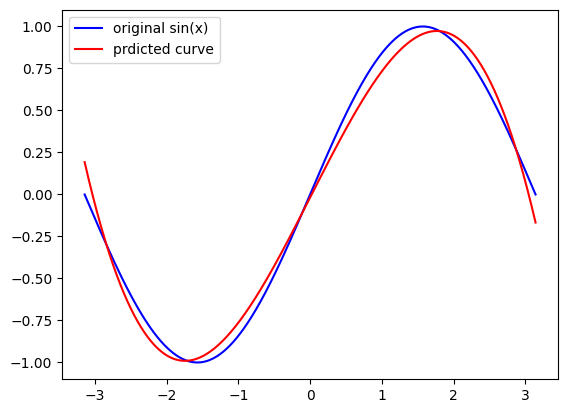

In [7]:
import torch
import math
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
        
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
linear_layer = model[0]

print(f"Result : y = {linear_layer.bias.item()} + {linear_layer.weight[:,0].item()} x + {linear_layer.weight[:,1].item()} x^2 + {linear_layer.weight[:,2].item()} x^3") 

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

99 2539.45849609375
199 1094.509033203125
299 929.016845703125
399 826.8355102539062
499 704.2138061523438
599 573.9280395507812
699 450.2696533203125
799 340.83978271484375
899 247.89947509765625
999 171.8098907470703
1099 112.18254089355469
1199 68.08988189697266
1299 38.22816467285156
1399 20.465965270996094
1499 12.029159545898438
1599 9.313783645629883
1699 8.884969711303711
1799 8.911264419555664
1899 8.923768997192383
1999 8.901749610900879
Result : y = 1.2696987141680438e-06 + 0.8563047647476196 x + 1.1577080840652343e-06 x^2 + -0.0938178226351738 x^3


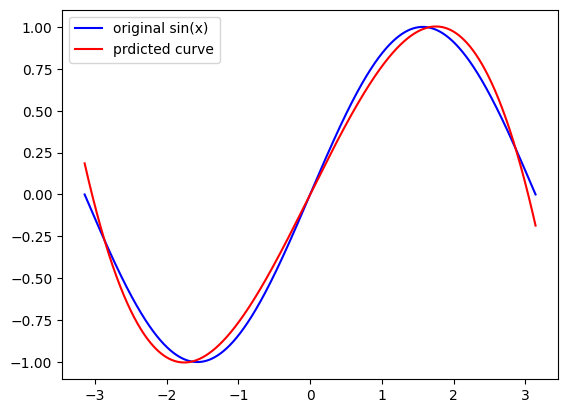

In [5]:
import torch
import math
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3

optimizer = torch.optim.RMSprop(model.parameters(),lr=learning_rate)

for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
            
linear_layer = model[0]

print(f"Result : y = {linear_layer.bias.item()} + {linear_layer.weight[:,0].item()} x + {linear_layer.weight[:,1].item()} x^2 + {linear_layer.weight[:,2].item()} x^3") 


plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()


99 4139.4462890625
199 2740.260009765625
299 1815.0281982421875
399 1203.20556640625
499 798.6286010742188
599 531.0955200195312
699 354.1847839355469
799 237.1992645263672
899 159.8402862548828
999 108.68515014648438
1099 74.85763549804688
1199 52.48830795288086
1299 37.696102142333984
1399 27.91436195373535
1499 21.445898056030273
1599 17.168367385864258
1699 14.33970832824707
1799 12.469194412231445
1899 11.232200622558594
1999 10.414216995239258
Result : y = 0.0014283392811194062 + 0.8179154396057129 x + -0.0002464122080709785 x^2 + -0.08780781179666519 x^3


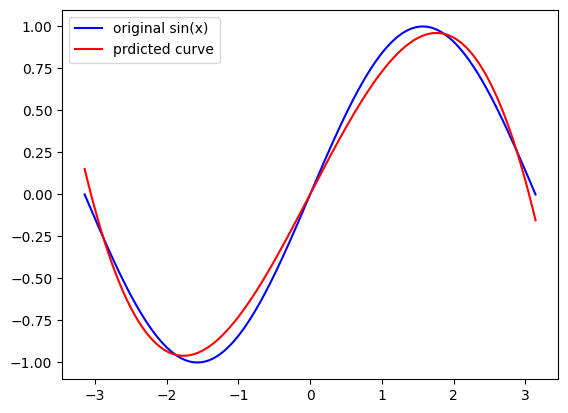

In [11]:
import torch
import math

class Polynomial3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        
    def forward(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    
    def string(self):
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'
    
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = Polynomial3()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

for t in range(2000):
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print("Result :", model.string())

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()



1999 388.6906433105469
3999 178.8927764892578
5999 82.2315673828125
7999 43.176090240478516
9999 24.63450050354004
11999 15.882555961608887
13999 12.015205383300781
15999 10.241131782531738
17999 9.474193572998047
19999 9.139115333557129
21999 8.801058769226074
23999 8.701006889343262
25999 8.860697746276855
27999 8.903264045715332
29999 8.836554527282715
Result : y = -0.0012535640271380544 + 0.855762779712677 x + -0.0003027922357432544 x^2 + -0.09334112703800201 x^3 + 7.286387699423358e-05 x^4 ? + 7.286387699423358e-05 x^5 ?


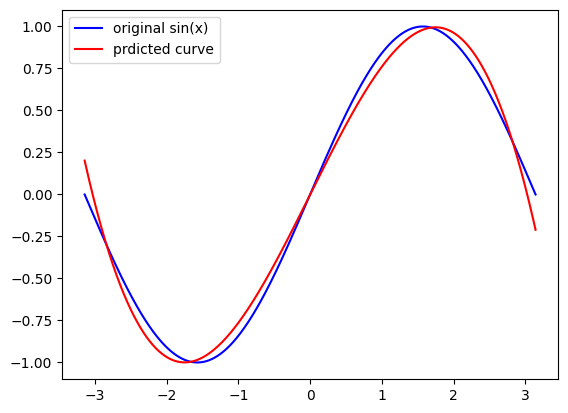

In [12]:
import random
import torch
import math

class DynamicNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))
        
    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4,6)):
            y = y + self.e * x ** exp
        return y
    
    def string(self):
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'
    
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)

for t in range(30000):
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'Result : {model.string()}')

plt.plot(x.cpu(),y.cpu(),'b', label = 'original sin(x)')
plt.plot(x.cpu(),y_pred.detach().cpu(),'r', label = 'prdicted curve')
plt.legend(loc='upper left')
plt.show()

